# Final project exploratory notebook

## 1. Exploring the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Load and clean the dataset

In [2]:
# Load the dataset with 'ISO-8859-1' encoding
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Drop rows with missing values in any column
df = df.dropna()
df = df[df['track_name'] != 'Love Grows (Where My Rosemary Goes)'] # Defective line with wrong format


# Display the first few rows after dropping NaNs
print("Data preview after dropping NaNs:")
print(df.head())

# Check for any missing values to confirm
print("Missing values after dropping rows with NaNs:")
print(df.isnull().sum())

Data preview after dropping NaNs:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0           

### Step 2: Examine the Fields and Columns

In [3]:
# Display column names
print("Columns in the dataset:")
print(df.columns)

# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())

# Get the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(df.describe())


Columns in the dataset:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

Missing values:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energ

### Step 3: Filter Songs from 2006 and Ahead

This is done because 2006 is the year when spotify was founded, and we want to analyze enteries, so this seems like the best way of action.

In [4]:
# Convert 'released_year' to numeric (if it's not already) and handle any errors
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')

# Filter the dataset to include only songs released from 2006 and onwards
df_filtered = df[df['released_year'] >= 2006]

# Verify the result to make sure the filtering is correct
print(f"Minimum year in df_filtered: {df_filtered['released_year'].min()}")  # Should be 2006 or later

# Display the first few rows of the filtered dataset
df_filtered.head()

Minimum year in df_filtered: 2008


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Step 4: Correlation Matrix

'streams' is not in the list of numerical columns. Checking the column type...
'streams' is now part of the numerical columns.


/var/folders/qs/lhh_w7853vg4zbh7qws83k5h0000gn/T/ipykernel_5563/1808737563.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')  # Convert to numeric and handle errors


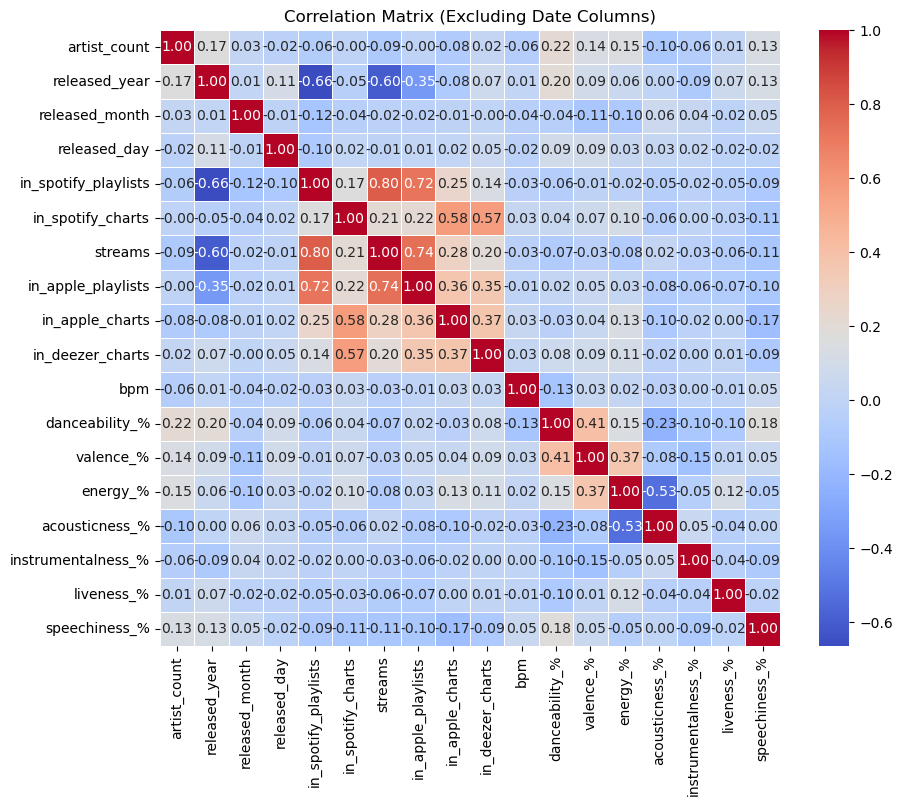

In [5]:
# Exclude the date columns
date_columns = ['released_year', 'released_month', 'released_day']

# Select only the numerical columns excluding the date ones
numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()

# Remove the date columns from the list of numerical columns
numerical_columns = [col for col in numerical_columns if col not in date_columns]

# Check if 'streams' is in the numerical columns list
if 'streams' not in numerical_columns:
    print("'streams' is not in the list of numerical columns. Checking the column type...")

    # Ensure 'streams' is numeric (convert if necessary)
    df_filtered['streams'] = pd.to_numeric(df_filtered['streams'], errors='coerce')  # Convert to numeric and handle errors

    # Re-check the list of numerical columns
    numerical_columns = df_filtered.select_dtypes(include=['number']).columns.tolist()
    if 'streams' not in numerical_columns:
        print("There was an issue with the 'streams' column. It might contain non-numeric values.")
    else:
        print("'streams' is now part of the numerical columns.")

# Calculate the correlation matrix
correlation_matrix = df_filtered[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Excluding Date Columns)")
plt.show()



### Step 5: Explore Additional Insights

#### 5.1. Distribution of Streams

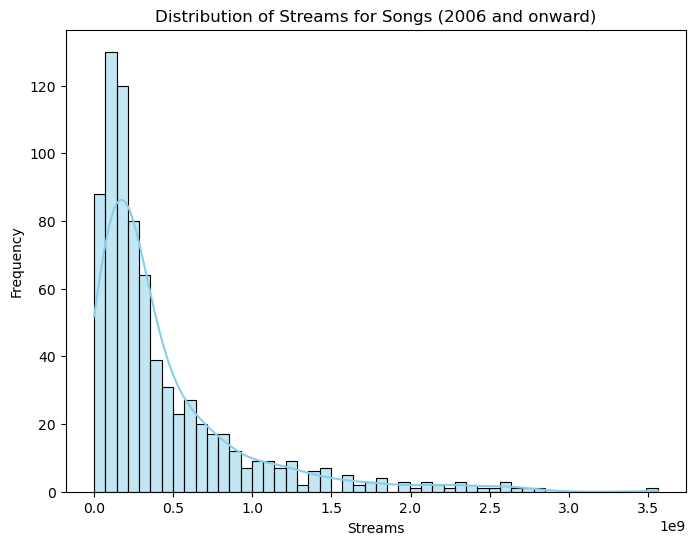

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df_filtered['streams'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Streams for Songs (2006 and onward)")
plt.xlabel("Streams")
plt.ylabel("Frequency")
plt.show()


#### 5.2. Relationship Between Streams and Playlist Inclusion


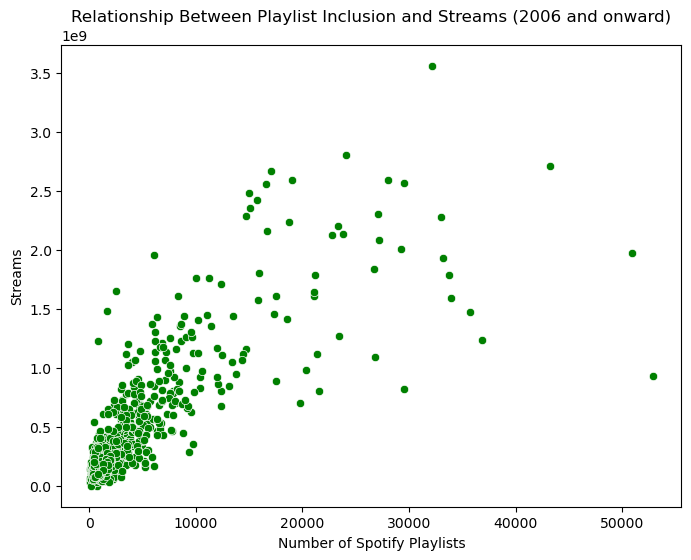

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='in_spotify_playlists', y='streams', color='green')
plt.title("Relationship Between Playlist Inclusion and Streams (2006 and onward)")
plt.xlabel("Number of Spotify Playlists")
plt.ylabel("Streams")
plt.show()


#### 5.3. Average Streams by Release Year

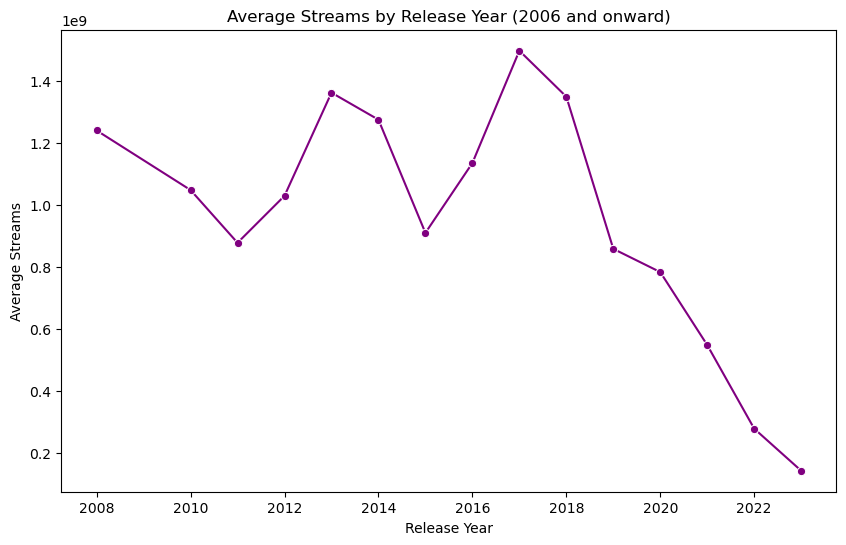

In [8]:
# Group by release year and calculate the average streams
average_streams_by_year = df_filtered.groupby('released_year')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_streams_by_year, x='released_year', y='streams', marker='o', color='purple')
plt.title("Average Streams by Release Year (2006 and onward)")
plt.xlabel("Release Year")
plt.ylabel("Average Streams")
plt.show()


### Step 6: Additional Exploration: Most Streamed Songs

In [9]:
# Sort the dataset by streams in descending order and show the top 10 songs
top_10_songs = df_filtered[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

print("Top 10 most streamed songs:")
print(top_10_songs)


Top 10 most streamed songs:
                                        track_name     streams
179                                   Shape of You  3562543890
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550
162                                      One Dance  2713922350
84                       STAY (with Justin Bieber)  2665343922
140                                       Believer  2594040133
725                                         Closer  2591224264
48                                         Starboy  2565529693
138                                        Perfect  2559529074
693                                      Seï¿½ï¿½o  2484812918
324                           Say You Won't Let Go  2420461338


### Final step: save the cleaned dataset

In [10]:
# Save the cleaned dataset to a new CSV file
df.to_csv('spotify-2023-cleaned.csv', index=False)

## 2. Creating the model

The objective of this part is to create a model that predicts if a song will be succesfull (the number of streams) given the characteristics (musical and non musical) of the song. 

### Step 1: Encode the categorical lables

In [11]:
from sklearn.preprocessing import LabelEncoder

# Create and fit the LabelEncoders for Country and EdLevel
le_artists = LabelEncoder()
df_filtered['artist(s)_name'] = le_artists.fit_transform(df_filtered['artist(s)_name'])

le_key = LabelEncoder()
df_filtered['key'] = le_key.fit_transform(df_filtered['key'])


le_mode = LabelEncoder()
df_filtered['mode'] = le_mode.fit_transform(df_filtered['mode'])
df_filtered.head()


/var/folders/qs/lhh_w7853vg4zbh7qws83k5h0000gn/T/ipykernel_5563/2170782642.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['artist(s)_name'] = le_artists.fit_transform(df_filtered['artist(s)_name'])
/var/folders/qs/lhh_w7853vg4zbh7qws83k5h0000gn/T/ipykernel_5563/2170782642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['key'] = le_key.fit_transform(df_filtered['key'])
/var/folders/qs/lhh_w7853vg4zbh7qws83k5h0000gn/T/ipykernel_5563/2170782642.py:12: SettingWithCopyWarning: 
A

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),260,2,2023,7,14,553,147,141381703,43,...,125,2,0,80,89,83,31,0,8,4
1,LALA,326,1,2023,3,23,1474,48,133716286,48,...,92,3,0,71,61,74,7,0,10,4
2,vampire,351,1,2023,6,30,1397,113,140003974,94,...,138,7,0,51,32,53,17,0,31,6
3,Cruel Summer,455,1,2019,8,23,7858,100,800840817,116,...,170,0,0,55,58,72,11,0,11,15
4,WHERE SHE GOES,34,1,2023,5,18,3133,50,303236322,84,...,144,0,1,65,23,80,14,63,11,6


### Step 2: Select features

In [15]:
from sklearn.model_selection import train_test_split

# Select the relevant features and target variable (all except charting data)
X = df_filtered[['artist(s)_name', 'artist_count', 'released_year','released_month', 'released_day', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%' ,'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%' ]]  # Features
y = df_filtered['streams']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the length of all datasets
print(f"Training feature set length: {len(X_train)}")
print(f"Testing feature set length: {len(X_test)}")
print(f"Training target set length: {len(y_train)}")
print(f"Testing target set length: {len(y_test)}")

Training feature set length: 609
Testing feature set length: 153
Training target set length: 609
Testing target set length: 153


###  Step 3: Compute mean square error

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3454758169521826e+17


 ### Step 4: Use Random forest regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the MSE for Random Forest
print(f"Mean Squared Error (Random Forest): {mse_rf}")

Mean Squared Error (Random Forest): 1.0750161185697213e+17
